# Module 3 : Performance measurements of Logistic regression

In [17]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Load given dataset
data = pd.read_csv("alzheimer.csv")

In [20]:
df=data.dropna()

In [21]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [22]:
df.rename(columns={"M/F":"GENDER"}, inplace=True)

In [23]:
df["Group"] = df['Group'].map({"Nondemented":"Nondemented", "Demented":"Demented", "Converted":"Demented"})

In [24]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['GENDER']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [26]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Group', axis=1)
#Response variable
y = df.loc[:,'Group'] 

In [27]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Logistic Regression :

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()

logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictR))

print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")



accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)



LR=accuracy.mean() * 100


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

    Demented       0.95      0.76      0.84        50
 Nondemented       0.82      0.96      0.89        57

    accuracy                           0.87       107
   macro avg       0.89      0.86      0.87       107
weighted avg       0.88      0.87      0.87       107


Confusion Matrix result of Logistic Regression is:
 [[38 12]
 [ 2 55]]

Sensitivity :  0.76

Specificity :  0.9649122807017544

Cross validation test results of accuracy:
[0.90140845 0.95774648 0.94366197 0.92957746 0.95714286]

Accuracy result of Logistic Regression is: 93.7907444668008


In [29]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("m"))
    plt.title("Accuracy comparison of Alzheimer Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)

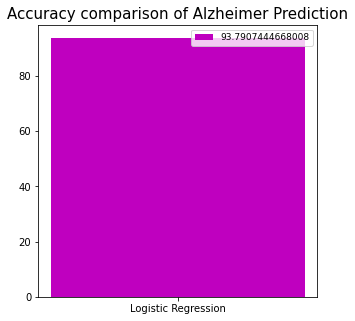

In [30]:
graph()

In [31]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 55
True Negative : 38
False Positive : 12
False Negative : 2

True Positive Rate : 0.9649122807017544
True Negative Rate : 0.76
False Positive Rate : 0.24
False Negative Rate : 0.03508771929824561

Positive Predictive Value : 0.8208955223880597
Negative predictive value : 0.95


Confusion matrix-LogisticRegression:
[[38 12]
 [ 2 55]]


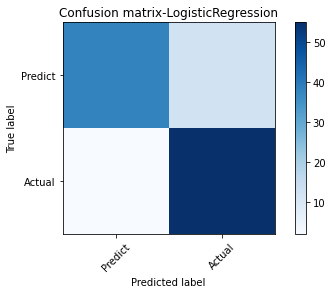

In [32]:
def plot_confusion_matrix(cm2, title='Confusion matrix-LogisticRegression', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-LogisticRegression:')
print(cm2)
plot_confusion_matrix(cm2)